In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import math

import plotly.express as px
from sklearn.datasets import make_classification

In [32]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [33]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [45]:
players = pd.read_csv('./clean_data/players.csv')
countries = pd.read_csv('./clean_data/countries.csv')
clubs = pd.read_csv('./clean_data/clubs.csv')

In [46]:
players = players.merge(countries[['name', 'points']], how='left', left_on='country', right_on='name')
players = players.rename(columns={'points': 'point_of_tournament', 'name_x': 'name'})
players = players.drop('name_y', axis=1)
players.drop(['shirt_number'], axis=1)

,name,market_value,club,country,league,nationality,age,height,preferred_foot,position,...,tactical,defending,creativity,saves,anticipation,ball_distribution,aerial,avg_score_last_12_months,appearances_last_12_months,point_of_tournament
0,Luciano Gondou,7400,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,22,189,Left,F,...,51,33,49,0,0,0,0,7.14,33,1858.00
1,Maximiliano Romero,2500,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,25,179,Right,F,...,54,32,47,0,0,0,0,6.86,37,1858.00
2,Gastón Verón,1200,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,22,184,Right,F,...,45,29,48,0,0,0,0,6.80,34,1858.00
3,Alan Lescano,2900,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,22,182,Left,M,...,47,38,59,0,0,0,0,6.88,37,1858.00
4,Leonardo Heredia,1200,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,28,187,Right,M,...,41,33,44,0,0,0,0,6.82,38,1858.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809,Edward Sarpong,230,Birkirkara FC,Malta,Premier League,GHA,27,175,Left,D,...,40,47,42,0,0,0,0,6.89,22,973.14
11810,Olivier Rommens,220,Balzan F.C.,Malta,Premier League,BEL,29,177,Right,M,...,40,42,51,0,0,0,0,7.00,16,973.14
11811,Jelle Goselink,190,Phnom Penh Crown,Cambodia,Cambodian Premier League,NED,24,189,Right,F,...,47,33,37,0,0,0,0,6.67,11,925.40
11812,Higor Leite,130,Sheikh Jamal DC,Bangladesh,Premier League,BRA,30,177,Right,M,...,43,41,50,0,0,0,0,6.83,18,905.30


In [47]:
data_original = players.copy()

In [48]:
players.head()

,name,market_value,club,country,league,nationality,age,height,preferred_foot,position,...,tactical,defending,creativity,saves,anticipation,ball_distribution,aerial,avg_score_last_12_months,appearances_last_12_months,point_of_tournament
0,Luciano Gondou,7400,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,22,189,Left,F,...,51,33,49,0,0,0,0,7.14,33,1858.0
1,Maximiliano Romero,2500,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,25,179,Right,F,...,54,32,47,0,0,0,0,6.86,37,1858.0
2,Gastón Verón,1200,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,22,184,Right,F,...,45,29,48,0,0,0,0,6.80,34,1858.0
3,Alan Lescano,2900,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,22,182,Left,M,...,47,38,59,0,0,0,0,6.88,37,1858.0
4,Leonardo Heredia,1200,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,28,187,Right,M,...,41,33,44,0,0,0,0,6.82,38,1858.0


# Trích xuất đặc trưng #

### Mã hóa dữ liệu danh mục

In [49]:
players['position'].unique()

array(['F', 'M', 'D', 'G'], dtype=object)

In [50]:
# label_encoder = LabelEncoder()
# players['position'] = label_encoder.fit_transform(players['position'])

one_hot_encoded = pd.get_dummies(players['position'], prefix='pos')
players = pd.concat([players, one_hot_encoded], axis=1)
players = players.drop('position', axis=1)



In [51]:
print(players.head(1))

             name  market_value                club    country  \
0  Luciano Gondou          7400  Argentinos Juniors  Argentina   

                       league nationality  age  height preferred_foot  \
0  Liga Profesional de Fútbol         ARG   22     189           Left   

   shirt_number  ...  anticipation  ball_distribution  aerial  \
0            32  ...             0                  0       0   

   avg_score_last_12_months  appearances_last_12_months  point_of_tournament  \
0                      7.14                          33               1858.0   

   pos_D  pos_F  pos_G  pos_M  
0  False   True  False  False  

[1 rows x 26 columns]


In [52]:
label_encoder = LabelEncoder()
players['preferred_foot'] = label_encoder.fit_transform(players['preferred_foot'])

### Xử lý ngoại lệ

In [53]:
iqr_market_value = players['market_value'].quantile(0.75) - players['market_value'].quantile(0.25)
upper_limit = players['market_value'].quantile(0.75) + 1.5 * iqr_market_value
lower_limit = players['market_value'].quantile(0.25) - 1.5 * iqr_market_value
print(upper_limit, lower_limit)

players1 = players[players['market_value'] < upper_limit]

players['market_value'].describe()

5512.5 -2787.5


count     11814.000000
mean       3495.006856
std        9388.790494
min          23.000000
25%         325.000000
50%         720.000000
75%        2400.000000
max      196000.000000
Name: market_value, dtype: float64

In [13]:
# players[players['market_value'] > 50000].shape[0]

### Chuẩn hóa dữ liệu

In [54]:
players

,name,market_value,club,country,league,nationality,age,height,preferred_foot,shirt_number,...,anticipation,ball_distribution,aerial,avg_score_last_12_months,appearances_last_12_months,point_of_tournament,pos_D,pos_F,pos_G,pos_M
0,Luciano Gondou,7400,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,22,189,1,32,...,0,0,0,7.14,33,1858.00,False,True,False,False
1,Maximiliano Romero,2500,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,25,179,2,9,...,0,0,0,6.86,37,1858.00,False,True,False,False
2,Gastón Verón,1200,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,22,184,2,10,...,0,0,0,6.80,34,1858.00,False,True,False,False
3,Alan Lescano,2900,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,22,182,1,22,...,0,0,0,6.88,37,1858.00,False,False,False,True
4,Leonardo Heredia,1200,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,28,187,2,15,...,0,0,0,6.82,38,1858.00,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809,Edward Sarpong,230,Birkirkara FC,Malta,Premier League,GHA,27,175,1,36,...,0,0,0,6.89,22,973.14,True,False,False,False
11810,Olivier Rommens,220,Balzan F.C.,Malta,Premier League,BEL,29,177,2,14,...,0,0,0,7.00,16,973.14,False,False,False,True
11811,Jelle Goselink,190,Phnom Penh Crown,Cambodia,Cambodian Premier League,NED,24,189,2,10,...,0,0,0,6.67,11,925.40,False,True,False,False
11812,Higor Leite,130,Sheikh Jamal DC,Bangladesh,Premier League,BRA,30,177,2,10,...,0,0,0,6.83,18,905.30,False,False,False,True


In [55]:
min_max = MinMaxScaler()
numeric_columns = players.select_dtypes(include=['float64', 'int64', 'int32', 'bool']).columns
data = pd.DataFrame(players, columns=numeric_columns)

In [58]:
data.drop(['shirt_number'], axis=1, inplace=True)
data.head(2)

,market_value,age,height,preferred_foot,attacking,technical,tactical,defending,creativity,saves,anticipation,ball_distribution,aerial,avg_score_last_12_months,appearances_last_12_months,point_of_tournament,pos_D,pos_F,pos_G,pos_M
0,7400,22,189,1,68,55,51,33,49,0,0,0,0,7.14,33,1858.0,False,True,False,False
1,2500,25,179,2,62,48,54,32,47,0,0,0,0,6.86,37,1858.0,False,True,False,False


In [64]:
cc.to_csv('data_chua_chuan_hoa.csv', index=False)

In [63]:
cc = pd.read_csv('data_chua_chuan_hoa.csv')
#in column pos_D, if true value is 1, false value is 0
cc['pos_D'] = cc['pos_D'].astype(int)
cc['pos_F'] = cc['pos_F'].astype(int)
cc['pos_G'] = cc['pos_G'].astype(int)
cc['pos_M'] = cc['pos_M'].astype(int)
cc

,market_value,age,height,preferred_foot,attacking,technical,tactical,defending,creativity,saves,anticipation,ball_distribution,aerial,avg_score_last_12_months,appearances_last_12_months,point_of_tournament,pos_D,pos_F,pos_G,pos_M
0,7400,22,189,1,68,55,51,33,49,0,0,0,0,7.14,33,1858.00,0,1,0,0
1,2500,25,179,2,62,48,54,32,47,0,0,0,0,6.86,37,1858.00,0,1,0,0
2,1200,22,184,2,64,51,45,29,48,0,0,0,0,6.80,34,1858.00,0,1,0,0
3,2900,22,182,1,58,60,47,38,59,0,0,0,0,6.88,37,1858.00,0,0,0,1
4,1200,28,187,2,55,50,41,33,44,0,0,0,0,6.82,38,1858.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809,230,27,175,1,38,50,40,47,42,0,0,0,0,6.89,22,973.14,1,0,0,0
11810,220,29,177,2,50,61,40,42,51,0,0,0,0,7.00,16,973.14,0,0,0,1
11811,190,24,189,2,55,46,47,33,37,0,0,0,0,6.67,11,925.40,0,1,0,0
11812,130,30,177,2,50,48,43,41,50,0,0,0,0,6.83,18,905.30,0,0,0,1


In [377]:
data.head(3)

,market_value,age,height,preferred_foot,shirt_number,attacking,technical,tactical,defending,creativity,...,anticipation,ball_distribution,aerial,avg_score_last_12_months,appearances_last_12_months,point_of_tournament,pos_D,pos_F,pos_G,pos_M
0,0.037642,0.222222,0.66,0.5,0.316327,0.723404,0.572917,0.5000,0.358696,0.494949,...,0.0,0.0,0.0,0.364754,0.410714,1.0,0.0,1.0,0.0,0.0
1,0.012639,0.333333,0.46,1.0,0.081633,0.659574,0.500000,0.5375,0.347826,0.474747,...,0.0,0.0,0.0,0.250000,0.482143,1.0,0.0,1.0,0.0,0.0
2,0.006006,0.222222,0.56,1.0,0.091837,0.680851,0.531250,0.4250,0.315217,0.484848,...,0.0,0.0,0.0,0.225410,0.428571,1.0,0.0,1.0,0.0,0.0


In [15]:
data.drop(['shirt_number'], axis=1, inplace=True)  

In [16]:
data.head(3)

,market_value,age,height,preferred_foot,attacking,technical,tactical,defending,creativity,saves,anticipation,ball_distribution,aerial,avg_score_last_12_months,appearances_last_12_months,point_of_tournament,pos_D,pos_F,pos_G,pos_M
0,0.037642,0.222222,0.66,0.5,0.723404,0.572917,0.5000,0.358696,0.494949,0.0,0.0,0.0,0.0,0.364754,0.410714,1.0,0.0,1.0,0.0,0.0
1,0.012639,0.333333,0.46,1.0,0.659574,0.500000,0.5375,0.347826,0.474747,0.0,0.0,0.0,0.0,0.250000,0.482143,1.0,0.0,1.0,0.0,0.0
2,0.006006,0.222222,0.56,1.0,0.680851,0.531250,0.4250,0.315217,0.484848,0.0,0.0,0.0,0.0,0.225410,0.428571,1.0,0.0,1.0,0.0,0.0


In [18]:
data.to_csv('data_chuan_hoa.csv', index=False)

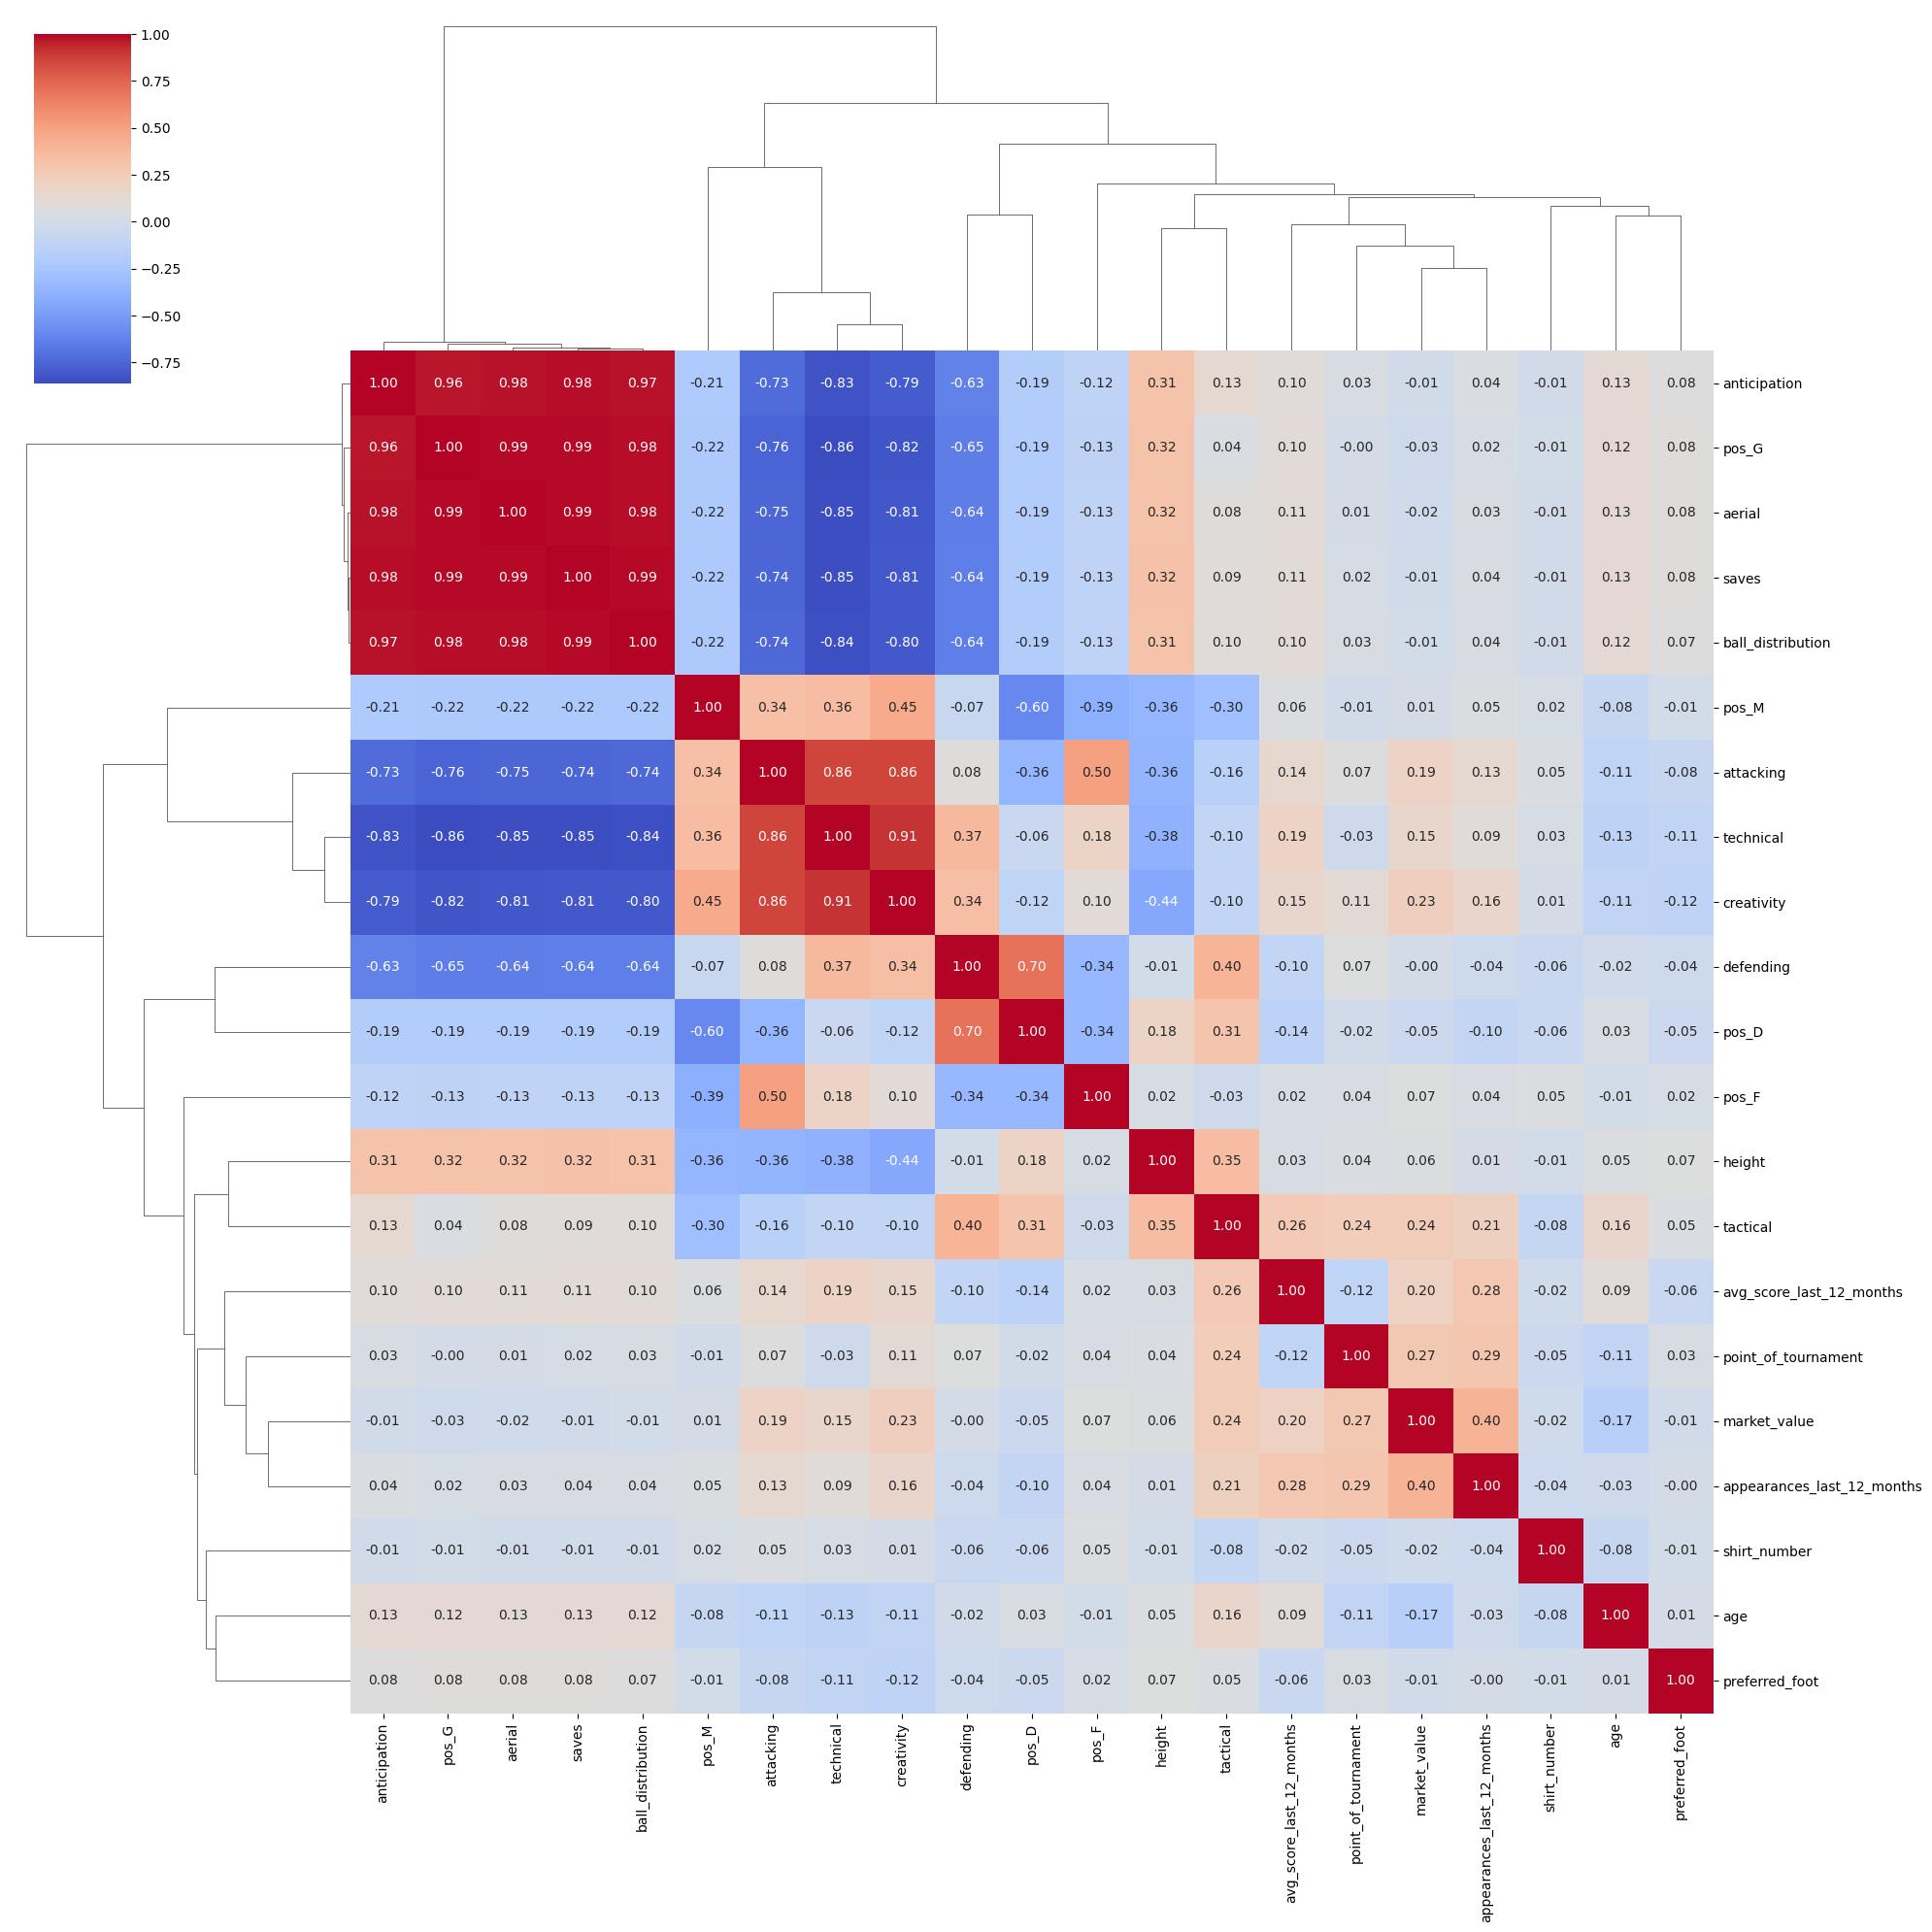

In [378]:
sns.clustermap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', figsize=(20, 20))

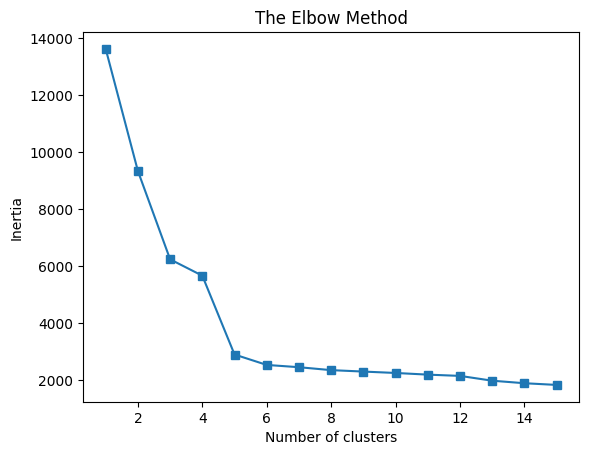

In [379]:
l = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(data.values)
    l.append(kmeans.inertia_)

plt.plot(range(1, 16), l, marker='s')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [380]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data.values)

data_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])

px.scatter(data_tsne, x='x', y='y')

In [381]:
kmeans = KMeans(n_clusters=5)
data_tsne['cluster'] = kmeans.fit_predict(data_tsne)

px.scatter(data_tsne, x='x', y='y', color='cluster')

In [382]:
kmeans = KMeans(n_clusters=6)
data_tsne['cluster'] = kmeans.fit_predict(data_tsne)

px.scatter(data_tsne, x='x', y='y', color='cluster')

In [383]:
kmeans = KMeans(n_clusters=10)
data_tsne['cluster'] = kmeans.fit_predict(data_tsne)

px.scatter(data_tsne, x='x', y='y', color='cluster')